In [7]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle

In [8]:
# --- Konfigurasi ---
unsupervised_data_path = '../data/unsupervised_ready_data.csv'
model_output_dir = '../models/'
os.makedirs(model_output_dir, exist_ok=True)

In [9]:
# --- 1. Memuat Data ---
print("Memuat data yang sudah diproses...")
try:
    df_unsupervised = pd.read_csv(unsupervised_data_path)
    print(f"Data unsupervised dimuat. Ukuran: {df_unsupervised.shape}")
except FileNotFoundError:
    print("Error: File data tidak ditemukan.")
    exit()

X_cluster = df_unsupervised.copy()

Memuat data yang sudah diproses...
Data unsupervised dimuat. Ukuran: (558837, 40)


In [ ]:
# --- 2. Mencari K Optimal pada SAMPEL DATA ---
print("\nMengambil sampel data untuk pencarian K optimal...")
sample_size_for_k = min(50000, len(X_cluster))
X_cluster_sample = X_cluster.sample(n=sample_size_for_k, random_state=42)
print(f"Menggunakan sampel berukuran {X_cluster_sample.shape} untuk Elbow & Silhouette.")

inertia = []
silhouette_scores = []
range_k = range(2, 11)
print("\nMencari jumlah klaster optimal (Elbow Method & Silhouette Score) pada SAMPEL...")

for k in range_k:
    print(f"  Menganalisis untuk k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit pada data sampel
    kmeans.fit(X_cluster_sample)
    inertia.append(kmeans.inertia_)
    # Hitung silhouette score pada data sampel
    silhouette_scores.append(silhouette_score(X_cluster_sample, kmeans.labels_))


Mengambil sampel data untuk pencarian K optimal...
Menggunakan sampel berukuran (50000, 40) untuk Elbow & Silhouette.

Mencari jumlah klaster optimal (Elbow Method & Silhouette Score) pada SAMPEL...
  Menganalisis untuk k=2...
  Menganalisis untuk k=3...
  Menganalisis untuk k=4...
  Menganalisis untuk k=5...
  Menganalisis untuk k=6...
  Menganalisis untuk k=7...
  Menganalisis untuk k=8...
  Menganalisis untuk k=9...
  Menganalisis untuk k=10...


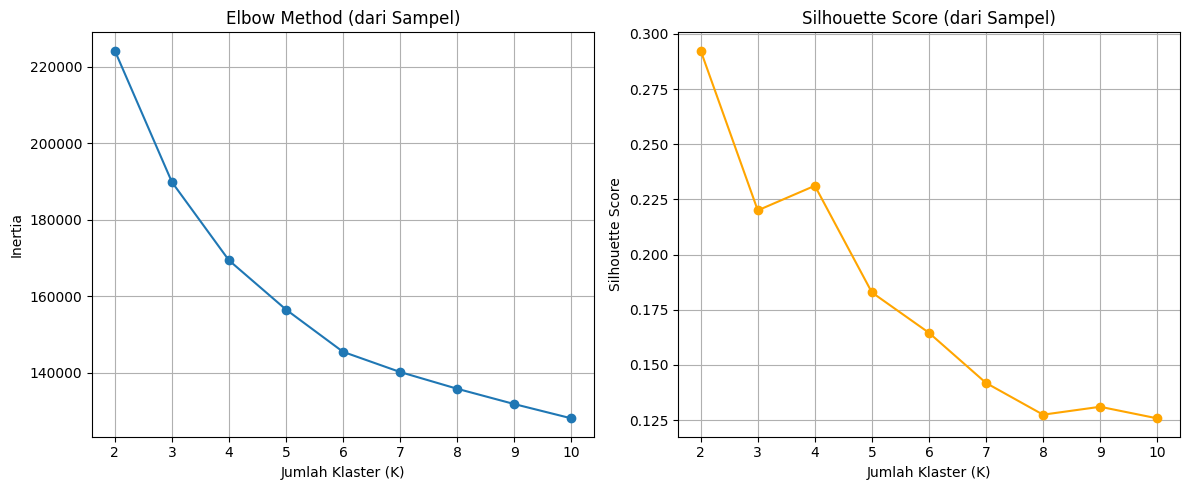

In [11]:
# Plot hasil dari analisis sampel
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method (dari Sampel)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_k, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score (dari Sampel)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range_k)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# --- 3. Melatih Model Final pada SELURUH DATA ---
# Tentukan K dari grafik di atas. Misal kita lihat K=4 adalah yang terbaik.
n_clusters_chosen = 4
print(f"\nMelatih model K-Means final pada SELURUH data dengan K={n_clusters_chosen}...")

# Latih model final pada SELURUH data (X_cluster)
final_kmeans_model = KMeans(n_clusters=n_clusters_chosen, random_state=42, n_init=10)
final_kmeans_model.fit(X_cluster)
print("Training model final selesai.")

# Tambahkan label klaster ke DataFrame utama
df_unsupervised['cluster_label'] = final_kmeans_model.labels_

print("\nDistribusi anggota klaster:")
print(df_unsupervised['cluster_label'].value_counts().sort_index())


Melatih model K-Means final pada SELURUH data dengan K=4...
Training model final selesai.

Distribusi anggota klaster:
cluster_label
0     51754
1    254778
2    166951
3     85354
Name: count, dtype: int64



Membuat visualisasi klaster menggunakan PCA...


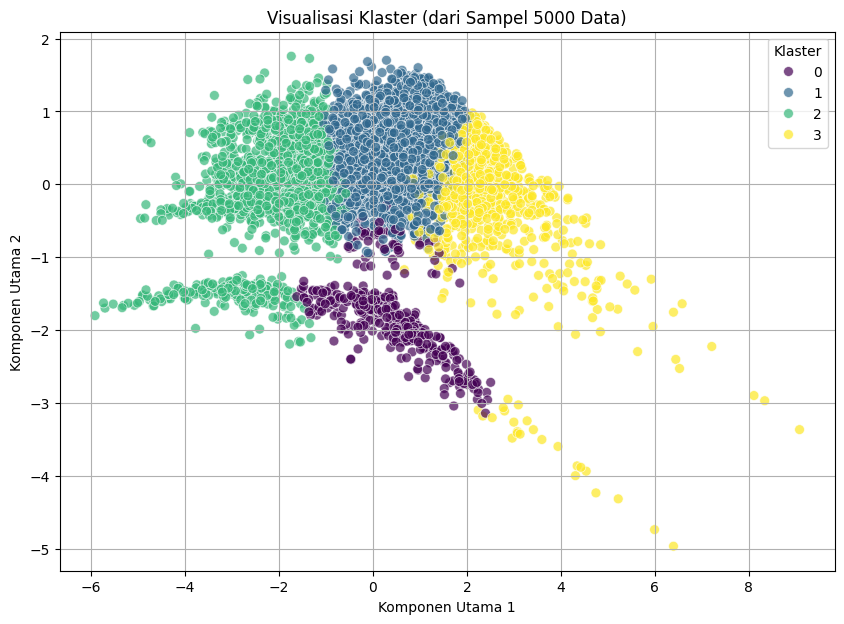

In [ ]:
# --- 4. Visualisasi Klaster menggunakan SAMPEL ---
print("\nMembuat visualisasi klaster menggunakan PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

df_unsupervised['pca_1'] = X_pca[:, 0]
df_unsupervised['pca_2'] = X_pca[:, 1]

# Untuk plot, gunakan sampel lagi agar tidak macet!
sample_size_for_plot = min(5000, len(df_unsupervised))
df_plot_sample = df_unsupervised.sample(n=sample_size_for_plot, random_state=42)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='cluster_label',
    data=df_plot_sample,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title(f'Visualisasi Klaster (dari Sampel {sample_size_for_plot} Data)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Klaster')
plt.grid(True)
plt.show()


In [14]:
# --- 5. Menyimpan Model Final ---
model_filename_cluster = os.path.join(model_output_dir, 'kmeans_clusterer.pkl')
with open(model_filename_cluster, 'wb') as file:
    pickle.dump(final_kmeans_model, file)
print(f"Model K-Means Clusterer disimpan ke '{model_filename_cluster}'")

Model K-Means Clusterer disimpan ke '../models/kmeans_clusterer.pkl'
